# Feature Engineering

Feature engineering adalah proses dimana kita membuat fitur baru dari data yang telah kita miliki atau transformasi dari fitur yang telah ada, sehingga fitur tersebut lebih dapat merepresentasikan informasi yang berguna dalam mempelajari suatu masalah atau membuat prediksi.

Tujuan dari feature engineering adalah untuk meningkatkan kinerja model atau meningkatkan pemahaman kita terhadap data. Dalam beberapa kasus, data mentah yang telah kita kumpulkan tidak selalu cukup untuk membangun model yang akurat atau memberikan wawasan yang berguna. Oleh karena itu, dengan melakukan feature engineering, kita dapat menghasilkan fitur yang lebih informatif dan dapat meningkatkan kualitas model atau wawasan yang kita hasilkan.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# Import Libraries yang diperlukan

import pandas as pd
import numpy as np
import json

import scipy.stats as stats
import statistics

import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# eda = '/content/drive/MyDrive/Final Project Experiment/2. EDA.csv'
df = pd.read_csv('2. EDA.csv')
# df = pd.read_csv(eda)
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,subcategory,Category,delivery_time_days,order_day,order_day_num
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16,2017-05-23 10:47:57,...,2,146.87,8577,itaquaquecetuba,SP,office_furniture,Furniture,9,Tuesday,1
1,fbd40c083aa8cddebb5265b2ba6aaf2e,f40ab89b622248b7ca125af4b486b887,32341,contagem,MG,e0b26f14d2bcc710bb02f77a4628763b,delivered,2017-05-16 10:00:49,2017-05-17,2017-05-23 10:35:48,...,1,155.70,8577,itaquaquecetuba,SP,office_furniture,Furniture,12,Tuesday,1
2,1c37c0f0cd1d88d46d9fc9494762abbd,432ecfa8b7b7ad2663c7abed0dc83c51,31270,belo horizonte,MG,c4e2bd2043fbd75b325a47adfabf0d77,delivered,2018-03-15 07:45:10,2018-03-15,2018-03-27 15:58:41,...,3,150.07,8577,itaquaquecetuba,SP,office_furniture,Furniture,21,Thursday,3
3,c49bec5f74f0413130abdaed8e7621d0,67d6f91d256bdf128fc960a166f413d5,25640,petropolis,RJ,0d831c5aa932379c1cf5b0b1b40b214b,delivered,2017-10-13 10:36:54,2017-10-13,2017-10-24 18:58:49,...,1,151.17,8577,itaquaquecetuba,SP,office_furniture,Furniture,19,Friday,4
4,f91eb13e253823f25cf9a20fc2d08f56,1c91f8d50340522dd6601237ad13afff,78500,colider,MT,be2463c66944514bb175f7a519a72cd7,delivered,2018-02-07 19:01:48,2018-02-07,2018-02-20 13:59:00,...,1,160.18,8577,itaquaquecetuba,SP,office_furniture,Furniture,23,Wednesday,2


In [4]:
len(df)

60698

In [5]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state', 'subcategory',
       'Category', 'delivery_time_days', 'order_day', 'order_day_num'],
      dtype='object')

## Feature Selection

In [6]:
df = df[['customer_unique_id', 'customer_city', 'customer_state', 'order_approved_at', 'order_id', 'delivery_time_days', 'seller_id', 'seller_state', 'Category', 
        'subcategory', 'payment_type', 'payment_installments','price', 'freight_value', 'payment_value', 'order_day', 'review_score']]

Dari sekian banyak fitur pada dataset, dipilih beberapa fitur yang dianggap penting dan relevan untuk menganalisis performa penjualan dari perspektif customer dan merchant. Berikut adalah penjelasan mengapa fitur-fitur tersebut dipilih:

- `customer_unique_id`: fitur ini dipilih karena memungkinkan kita untuk mengidentifikasi pelanggan yang melakukan transaksi. Dengan mengetahui pelanggan yang berbeda, kita dapat menganalisis perilaku pelanggan dan memperkirakan loyalitas pelanggan terhadap toko online tersebut.

- `customer_city` dan `customer_state`: fitur ini dipilih karena memungkinkan kita untuk mengidentifikasi lokasi pelanggan yang melakukan transaksi. Dengan mengetahui lokasi pelanggan, kita dapat menganalisis tren pembelian di daerah tertentu dan mengoptimalkan strategi pemasaran untuk daerah-daerah tersebut.

- `order_approved_at` dan `order_id`: fitur ini dipilih karena memungkinkan kita untuk melacak waktu transaksi dan mengidentifikasi setiap transaksi secara unik. Dengan informasi ini, kita dapat menganalisis pola waktu transaksi dan mengidentifikasi kecepatan persetujuan pesanan oleh pihak penjual.

- `delivery_time_days`: fitur ini dipilih karena memungkinkan kita untuk menghitung waktu pengiriman produk ke pelanggan. Dengan informasi ini, kita dapat menganalisis kinerja pengiriman oleh perusahaan kurir dan mengidentifikasi permasalahan pengiriman yang perlu diperbaiki.

- `seller_id` dan `seller_state`: fitur ini dipilih karena memungkinkan kita untuk mengidentifikasi penjual dan lokasi penjual. Dengan informasi ini, kita dapat menganalisis performa penjualan dari perspektif penjual dan mengidentifikasi penjual yang mungkin perlu ditingkatkan kinerjanya.

- `Category` dan `subcategory`: fitur ini dipilih karena memungkinkan kita untuk mengidentifikasi kategori dan subkategori produk yang terjual. Dengan informasi ini, kita dapat menganalisis tren pembelian di kategori dan subkategori tertentu, dan mengidentifikasi produk yang paling diminati oleh pelanggan.

- `payment_type` dan `payment_installments`: fitur ini dipilih karena memungkinkan kita untuk menganalisis metode pembayaran yang paling populer dan rata-rata cicilan pembayaran yang dilakukan oleh pelanggan.

- `price`, `freight_value`, dan `payment_value`: fitur ini dipilih karena memungkinkan kita untuk menganalisis besarnya biaya yang dikeluarkan oleh pelanggan dan mengidentifikasi faktor-faktor yang mempengaruhi biaya tersebut, seperti jarak pengiriman, harga produk, dan metode pembayaran. Dengan informasi ini, kita dapat mengoptimalkan harga dan biaya pengiriman untuk meningkatkan penjualan dan keuntungan.

## RFM Analysis

RFM analysis adalah salah satu teknik segmentasi pelanggan yang digunakan untuk memahami dan mengelompokkan pelanggan berdasarkan perilaku pembelian mereka. RFM adalah singkatan dari `Recency`, `Frequency`, dan `Monetary`.

- `Recency`: Menunjukkan kapan terakhir kali pelanggan melakukan pembelian. Pelanggan yang melakukan pembelian baru-baru ini memiliki skor recency yang tinggi.
- `Frequency`: Menunjukkan seberapa sering pelanggan melakukan pembelian. Pelanggan yang sering melakukan pembelian memiliki skor frequency yang tinggi.
- `Monetary`: Menunjukkan seberapa besar nilai transaksi yang dilakukan oleh pelanggan. Pelanggan yang melakukan pembelian dengan nilai transaksi yang tinggi memiliki skor monetary yang tinggi.


Penggunaan fitur-fitur tersebut dapat memberikan pengaruh yang signifikan dalam pembuatan segmentasi customer menggunakan RFM analysis. Berikut adalah penjelasan tentang setiap fitur tersebut dan pengaruhnya dalam segmentasi:

- `'customer_unique_id'`: merupakan ID unik untuk setiap customer dan dapat digunakan untuk mengidentifikasi setiap customer secara individual dalam segmentasi.

- `'customer_city'` dan `'customer_state'`: fitur ini dapat membantu dalam segmentasi berdasarkan lokasi geografis customer, sehingga memudahkan dalam membuat strategi pemasaran yang lebih terfokus pada area tertentu.

- `'order_approved_at'`, `'order_id'`: fitur-fitur ini dapat digunakan untuk menghitung nilai RFM (Recency, Frequency, Monetary) untuk setiap customer. RFM digunakan untuk membagi customer ke dalam kelompok yang berbeda berdasarkan perilaku pembelian mereka.

- `'subcategory'` dan `'Category'`: fitur ini dapat membantu dalam segmentasi berdasarkan jenis produk yang dibeli oleh customer. Hal ini dapat membantu dalam memahami preferensi customer dan membuat strategi pemasaran yang lebih tepat sasaran.

- `'price'`, `'payment_type'`, dan `'payment_value'`: fitur ini dapat digunakan untuk menghitung nilai Moneter (Monetary Value) untuk setiap customer, yang menunjukkan seberapa banyak uang yang dihabiskan oleh customer dalam jangka waktu tertentu.

In [7]:
df.head()

,customer_unique_id,customer_city,customer_state,order_approved_at,order_id,delivery_time_days,seller_id,seller_state,Category,subcategory,payment_type,payment_installments,price,freight_value,payment_value,order_day,review_score
0,861eff4711a542e4b93843c6dd7febb0,franca,SP,2017-05-16,00e7ee1b050b8499577073aeb2a297a1,9,7c67e1448b00f6e969d365cea6b010ab,SP,Furniture,office_furniture,credit_card,2,124.99,21.88,146.87,Tuesday,4
1,f40ab89b622248b7ca125af4b486b887,contagem,MG,2017-05-17,e0b26f14d2bcc710bb02f77a4628763b,12,7c67e1448b00f6e969d365cea6b010ab,SP,Furniture,office_furniture,boleto,1,124.99,30.71,155.70,Tuesday,4
2,432ecfa8b7b7ad2663c7abed0dc83c51,belo horizonte,MG,2018-03-15,c4e2bd2043fbd75b325a47adfabf0d77,21,7c67e1448b00f6e969d365cea6b010ab,SP,Furniture,office_furniture,credit_card,3,116.99,33.08,150.07,Thursday,3
3,67d6f91d256bdf128fc960a166f413d5,petropolis,RJ,2017-10-13,0d831c5aa932379c1cf5b0b1b40b214b,19,7c67e1448b00f6e969d365cea6b010ab,SP,Furniture,office_furniture,credit_card,1,116.99,34.18,151.17,Friday,3
4,1c91f8d50340522dd6601237ad13afff,colider,MT,2018-02-07,be2463c66944514bb175f7a519a72cd7,23,7c67e1448b00f6e969d365cea6b010ab,SP,Furniture,office_furniture,credit_card,1,116.99,43.19,160.18,Wednesday,4


**Check Duplicated**

Dalam melakukan segmentasi customer kita akan menggunakan metode RFM Analysis sebagai dasar nya, oleh karena itu kita hanya akan menggunakan beberapa kolom yang berhubungan dengan metode tersebut seperti yang sudah dijelaskan sebelumnya.

Karena fitur / kolom yang kita gunakan berkurang maka akan ada potensi data-data yang memiliki duplicate, oleh karena itu kita akan drop data-data yang memiliki duplikat untuk memastikan data yang digunakan pada proses analisa bersih dan akurat.

In [8]:
df.duplicated().sum()

239

In [9]:
df = df[~df.duplicated()]

## Recency

In [10]:
df_recency = df.groupby(by='customer_unique_id',
                        as_index=False)['order_approved_at'].max()
df_recency.columns = ['CustomerName', 'LastPurchaseDate']

df_recency['LastPurchaseDate'] = pd.to_datetime(df_recency['LastPurchaseDate'])

recent_date = df_recency['LastPurchaseDate'].max()

df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)
df_recency.head()

,CustomerName,LastPurchaseDate,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,111
1,0000f46a3911fa3c0805444483337064,2017-03-10,537
2,0004bd2a26a76fe21f786e4fbd80607f,2018-04-05,146
3,0005e1862207bf6ccc02e4228effd9a0,2017-03-04,543
4,0006fdc98a402fceb4eb0ee528f6a8d4,2017-07-18,407


## Frequency

In [11]:
frequency_df = df.groupby(
    by=['customer_unique_id'], as_index=False)['order_id'].nunique()
frequency_df.columns = ['CustomerName', 'Frequency']
frequency_df.head()

,CustomerName,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000f46a3911fa3c0805444483337064,1
2,0004bd2a26a76fe21f786e4fbd80607f,1
3,0005e1862207bf6ccc02e4228effd9a0,1
4,0006fdc98a402fceb4eb0ee528f6a8d4,1


In [12]:
frequency_df.Frequency.value_counts()/len(frequency_df)*100

1     97.875443
2      1.978737
3      0.118690
4      0.016956
5      0.006782
6      0.001696
11     0.001696
Name: Frequency, dtype: float64

## Monetary

In [13]:
df['payment_value'] = df['price'] + df['freight_value']
df['Total'] = df['payment_value']
monetary_df = df.groupby(by='customer_unique_id', as_index=False)['Total'].sum()
monetary_df.columns = ['CustomerName', 'Monetary']
monetary_df.head()

,CustomerName,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000f46a3911fa3c0805444483337064,86.22
2,0004bd2a26a76fe21f786e4fbd80607f,166.98
3,0005e1862207bf6ccc02e4228effd9a0,150.12
4,0006fdc98a402fceb4eb0ee528f6a8d4,29.00


**Merging**

In [14]:
rf_df = df_recency.merge(frequency_df, on='CustomerName')
rfm_df = rf_df.merge(monetary_df, on='CustomerName').drop(
    columns='LastPurchaseDate')
rfm_df.head()

,CustomerName,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000f46a3911fa3c0805444483337064,537,1,86.22
2,0004bd2a26a76fe21f786e4fbd80607f,146,1,166.98
3,0005e1862207bf6ccc02e4228effd9a0,543,1,150.12
4,0006fdc98a402fceb4eb0ee528f6a8d4,407,1,29.00


In [15]:
rfm_df.rename(columns={'CustomerName': 'customer_unique_id'}, inplace=True)

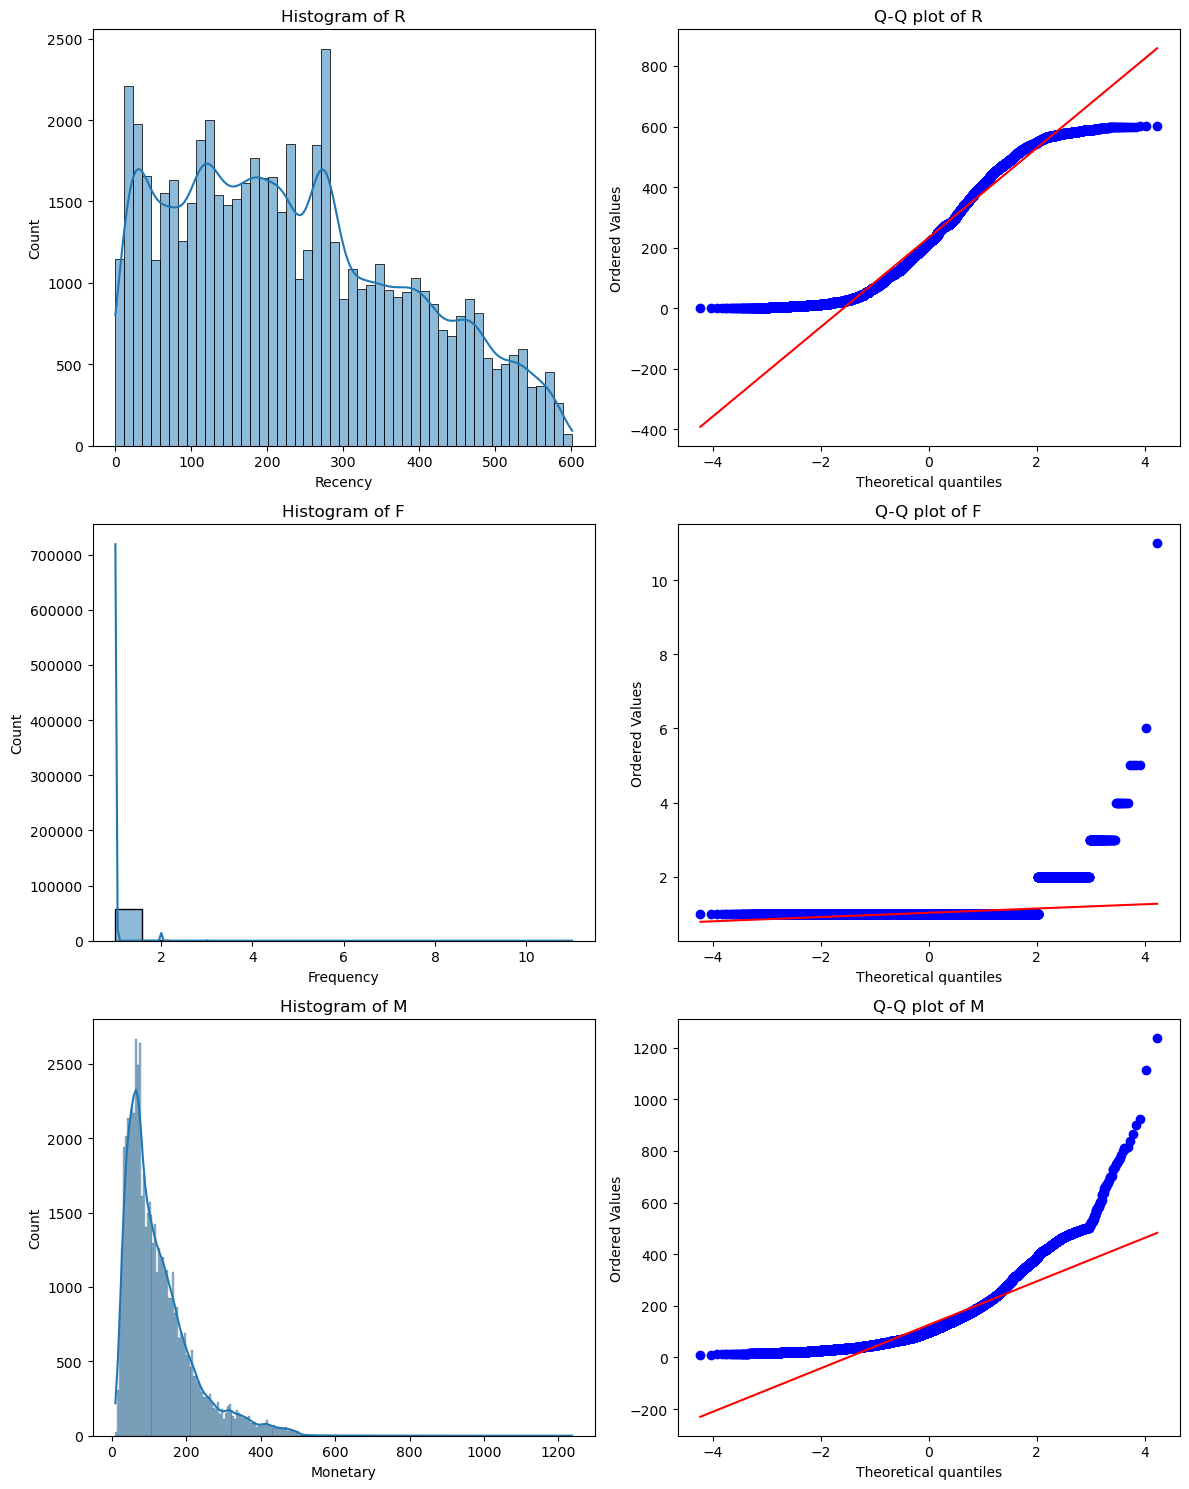

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

# Histogram R_rank
sns.histplot(rfm_df['Recency'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of R')

# Q-Q plot R_rank
stats.probplot(rfm_df['Recency'], dist='norm', plot=axes[0, 1])
axes[0, 1].set_title('Q-Q plot of R')

# Histogram F_rank
sns.histplot(rfm_df['Frequency'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of F')

# Q-Q plot F_rank
stats.probplot(rfm_df['Frequency'], dist='norm', plot=axes[1, 1])
axes[1, 1].set_title('Q-Q plot of F')

# Histogram M_rank
sns.histplot(rfm_df['Monetary'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Histogram of M')

# Q-Q plot M_rank
stats.probplot(rfm_df['Monetary'], dist='norm', plot=axes[2, 1])
axes[2, 1].set_title('Q-Q plot of M')

plt.tight_layout()
plt.show()

Jika dilihat pada gambar diatas, dapat disimpulkan bahwa `Recency` memiliki nilai yang melebar ke kanan sehingga dapat dikatakan bahwa distribusi skewed. Frekuensi memiliki skeweness yang lebih buruk, jika diperhatikan persebaran melebar ke kanan namun dengan majority of observation berada diantara 1-2 sedangkan nilai terus melebar hingga lebih dari 10. 

**Lalu bagaimana cara kita mengatasi skewness ini?**  
Jadi nanti ketika kita melakukan modeling dengan K-Means kita perlu menggunakan scaler yang tepat untuk masalah ini. Kita dapat menerapkan beberapa metode untuk mengatasi unskewness ini diantaranya adalah Logarithmic Transformation dan Box-Cox Transformation. Kita akan melakukan metode ini setelah kita mengurutkan data berdasarkan rank.

In [17]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False, method='dense')
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True, method='dense')
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True, method='dense')

Proses diatas dilakukan untuk mengurutkan berdasarkan rank atau urutan dari besar nya nilai Recency Frequency dan Monetary. Proses ini bertujuan untuk meberi skor atau penilaian dari ketiga faktor tersebut, sehingga setiap faktor memiliki kontribusi yang seimbang dalam menghasilkan skor.

Tujuan dari melakukan proses ranking pada variabel R, F, dan M menggunakan metode rank() pada pandas adalah untuk memberikan nilai ranking kepada setiap data dalam variabel tersebut. Proses ranking dilakukan untuk mengurutkan data dari nilai yang terendah hingga tertinggi atau sebaliknya, dan memberikan nilai ranking yang sesuai dengan urutan tersebut.

Proses ranking ini dapat membantu dalam analisis RFM karena dapat mengelompokkan pelanggan berdasarkan nilai RFM yang sama dengan lebih mudah dan akurat. Dengan memberikan nilai ranking pada setiap data, kita dapat membandingkan pelanggan berdasarkan urutan nilai RFM mereka. Misalnya, kita dapat melihat pelanggan yang memiliki ranking tertinggi pada variabel Recency, ranking terendah pada variabel Frequency, dan ranking tengah pada variabel Monetary, sehingga kita dapat mengelompokkan pelanggan tersebut ke dalam segmen tertentu.

Selain itu, proses ranking juga membantu dalam menghilangkan perbedaan skala antar variabel RFM. Setiap variabel RFM memiliki skala yang berbeda, sehingga nilai Monetary, yang memiliki range nilai yang besar, dapat mempengaruhi hasil analisis lebih besar daripada nilai Recency atau Frequency, yang memiliki range nilai yang lebih kecil. Dengan melakukan proses ranking, kita dapat memperkecil perbedaan skala antar variabel RFM dan membuat nilai RFM memiliki skala yang sama, sehingga memudahkan dalam menginterpretasikan hasil analisis.

*Simpel nya **Tujuan dari pemberian rank pada variabel Recency adalah untuk mengubah urutan data yang sebelumnya semakin kecil Recency maka semakin baru, menjadi semakin kecil nilainya maka semakin kecil juga pengaruhnya terhadap model**. Hal ini dilakukan agar variabel Recency memiliki pengaruh yang seimbang dengan variabel lainnya seperti Frequency dan Monetary. Dengan begitu, ketiga variabel tersebut dapat memberikan kontribusi yang seimbang dalam pembentukan segmentasi pelanggan.*

In [18]:
def boundaries(data, variables):
    Q1 = data[variables].quantile(.25)
    Q3 = data[variables].quantile(.75)
    IQR = Q3-Q1
    lower = Q1 - (3*IQR)
    upper = Q3 + (3*IQR)
    return Q1, Q3, IQR, lower, upper

In [19]:
rfm_df[['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,58977.000000,58977.000000,58977.000000
mean,233.297726,1.023195,126.207513
std,150.928745,0.169494,91.356966
min,0.000000,1.000000,10.070000
25%,111.000000,1.000000,61.790000
50%,216.000000,1.000000,99.900000
75%,343.000000,1.000000,163.970000
max,601.000000,11.000000,1236.760000


In [20]:
#modus data
mode_recency = statistics.mode(rfm_df['Recency'])
mode_frequency = statistics.mode(rfm_df['Frequency'])
mode_monetary = statistics.mode(rfm_df['Monetary'])

#menghitung range
#range=max-min
range_recency = max(rfm_df['Recency'])-min(rfm_df['Recency'])
range_frequency = max(rfm_df['Frequency'])-min(rfm_df['Frequency'])
range_monetary = max(rfm_df['Monetary'])-min(rfm_df['Monetary'])

#menghitung variance
var_recency = statistics.variance(rfm_df['Recency'])
var_frequency = statistics.variance(rfm_df['Frequency'])
var_monetary = statistics.variance(rfm_df['Monetary'])

#menghitung coefficient of variation
#cov=stdev/mean
cov_recency = np.std(rfm_df['Recency'])/np.mean(rfm_df['Recency'])
cov_frequency = np.std(rfm_df['Frequency'])/np.mean(rfm_df['Frequency'])
cov_monetary = np.std(rfm_df['Monetary'])/np.mean(rfm_df['Monetary'])

#menghitung skewness
skewness = rfm_df.skew()
#membuat skewness menjadi data frame degan nama kolom variable dan skewness
#urutan row: delivery_time, payment_installments, payment_value
skewness = pd.DataFrame(skewness)
skewness.reset_index(inplace=True)
skewness.columns=['varible','skewness']

#menghitung kurtosis
df_kurtosis = rfm_df.kurtosis()
#membuat kurtosis menjadi data frame degan nama kolom variable dan kurtosis
#urutan row: delivery_time, payment_installments, payment_value
df_kurtosis = pd.DataFrame(df_kurtosis)
df_kurtosis.reset_index(inplace=True)
df_kurtosis.columns=['variable','kurtosis']

#mengumpulkan parameter descriptive statistics dalam sebuah list
des_parameter = [(mode_recency, mode_frequency, mode_monetary),
                 (range_recency,range_frequency,range_monetary),
                 (var_recency, var_frequency, cov_monetary),
                 (cov_recency,cov_frequency,cov_monetary),
                 (skewness['skewness'].loc[0],skewness['skewness'].loc[1],skewness['skewness'].loc[2]),
                 (df_kurtosis['kurtosis'].loc[0], df_kurtosis['kurtosis'].loc[1], df_kurtosis['kurtosis'].loc[2])]

#membuat dataframe descriptive statistics kedua
df_des2 = pd.DataFrame(des_parameter,
                      index=('mode','range','variance','coefficient_of_variant','skewness','kurtosis'),
                      columns=('Recency', 'Frequency','Monetary'))
df_des2

,Recency,Frequency,Monetary
mode,127.000000,1.000000,77.570000
range,601.000000,10.000000,1226.690000
variance,22779.486151,0.028728,0.723857
coefficient_of_variant,0.646931,0.165650,0.723857
skewness,0.414697,11.350425,1.703513
kurtosis,-0.767658,293.664038,4.124920


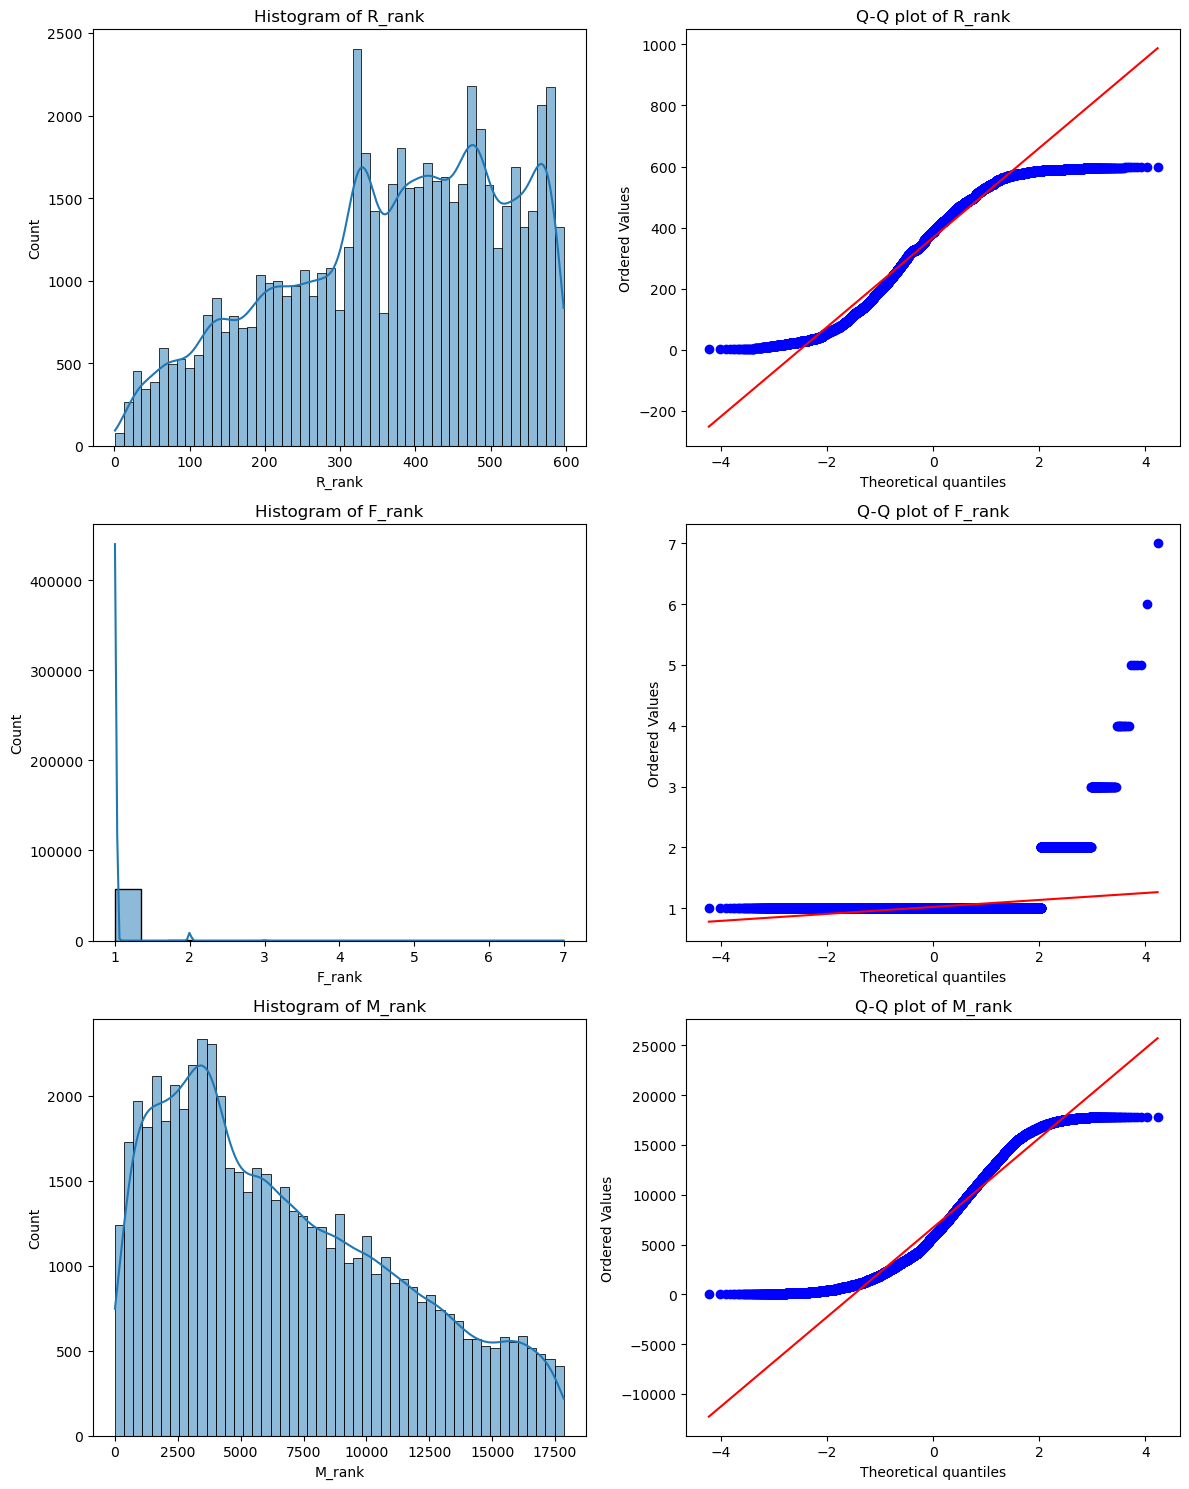

In [21]:
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

# Histogram R_rank
sns.histplot(rfm_df['R_rank'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of R_rank')

# Q-Q plot R_rank
stats.probplot(rfm_df['R_rank'], dist='norm', plot=axes[0, 1])
axes[0, 1].set_title('Q-Q plot of R_rank')

# Histogram F_rank
sns.histplot(rfm_df['F_rank'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of F_rank')

# Q-Q plot F_rank
stats.probplot(rfm_df['F_rank'], dist='norm', plot=axes[1, 1])
axes[1, 1].set_title('Q-Q plot of F_rank')

# Histogram M_rank
sns.histplot(rfm_df['M_rank'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Histogram of M_rank')

# Q-Q plot M_rank
stats.probplot(rfm_df['M_rank'], dist='norm', plot=axes[2, 1])
axes[2, 1].set_title('Q-Q plot of M_rank')

plt.tight_layout()
plt.show()

In [22]:
# Memeriksa skewness dari kolom F_rank
skewness_frank_ = pd.Series(rfm_df['F_rank']).skew()

# Memeriksa skewness dari kolom M_rank
skewness_mrank_ = pd.Series(rfm_df['M_rank']).skew()

# Memeriksa skewness dari kolom R_rank
skewness_rrank_ = pd.Series(rfm_df['R_rank']).skew()

print("Skewness F_rank box cox:", skewness_frank_)
print("Skewness M_rank box cox:", skewness_mrank_)
print("Skewness R_rank box cox:", skewness_rrank_)

Skewness F_rank box cox: 9.148852448270198
Skewness M_rank box cox: 0.5778081804541244
Skewness R_rank box cox: -0.4329862523074099


Jika berdasarkan informasi diatas, didapatkan bahwa fitur Frekuensi memiliki sejumlah outlier serta nilai skewness dari variabel ini diluar dari rentang -2 hingga 2. Hal ini menunjukkan bahwa kedua variabel tersebut memiliki data yang terdistribusi tidak normal.

**Box Cox Transformation**

Disini kita akan melakukan tranformasi untuk mengantisipasi atau meminimalisir skewness dari fitur frekuensi. Namun kita akan menerapkan Box-Cox Transformation pada seluruh fitur dari RFM, hal ini dilakukan karena ke-3 variabel ini merupakan satu kesatuan sehingga kita akan treat ke-3 tersebut dengan hal yang sama.

Pertanyaan-nya Apa itu `Box-Cox Transformation`?

Box-Cox Transformation adalah metode statistik yang digunakan untuk mentransformasikan data yang tidak terdistribusi normal menjadi lebih mendekati distribusi normal. Transformasi ini berguna dalam beberapa analisis statistik yang mengasumsikan asumsi normalitas.

Apa tujuan penggunaan `Box-Cox Transformation`?

- Tujuan utama dari transformasi ini adalah untuk mengurangi skewness atau kemiringan dalam distribusi data, sehingga memperbaiki asumsi distribusi normal yang menjadi dasar dari K-Means.

- Meningkatkan interpretasi statistik: Dengan mentransformasi data yang tidak terdistribusi normal menjadi lebih mendekati distribusi normal, interpretasi statistik seperti mean, standard deviation, dan lainnya menjadi lebih bermakna.

- K-Means pada data yang sudah di-transformasi akan menggunakan distribusi yang lebih simetris dan mendekati normal, sehingga dapat menghasilkan cluster yang lebih baik.

In [23]:
rfm_df

,customer_unique_id,Recency,Frequency,Monetary,R_rank,F_rank,M_rank
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,488.0,1.0,8607.0
1,0000f46a3911fa3c0805444483337064,537,1,86.22,65.0,1.0,4797.0
2,0004bd2a26a76fe21f786e4fbd80607f,146,1,166.98,456.0,1.0,10199.0
3,0005e1862207bf6ccc02e4228effd9a0,543,1,150.12,59.0,1.0,9150.0
4,0006fdc98a402fceb4eb0ee528f6a8d4,407,1,29.00,195.0,1.0,532.0
...,...,...,...,...,...,...,...
58972,fff96bc586f78b1f070da28c4977e810,14,1,63.42,584.0,1.0,3047.0
58973,fffb09418989a0dbff854a28163e47c6,253,1,73.16,349.0,1.0,3818.0
58974,fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58,340.0,1.0,4682.0
58975,ffff5962728ec6157033ef9805bacc48,119,1,133.69,480.0,1.0,8027.0


In [24]:
import scipy.stats as stats

# Melakukan Box-Cox transform pada kolom F_rank
rfm_df['F_rank_boxcox'], _ = stats.boxcox(rfm_df['F_rank'])

# Melakukan Box-Cox transform pada kolom M_rank
rfm_df['M_rank_boxcox'], _ = stats.boxcox(rfm_df['M_rank'])

# Melakukan Box-Cox transform pada kolom R_rank
rfm_df['R_rank_boxcox'], _ = stats.boxcox(rfm_df['R_rank'])

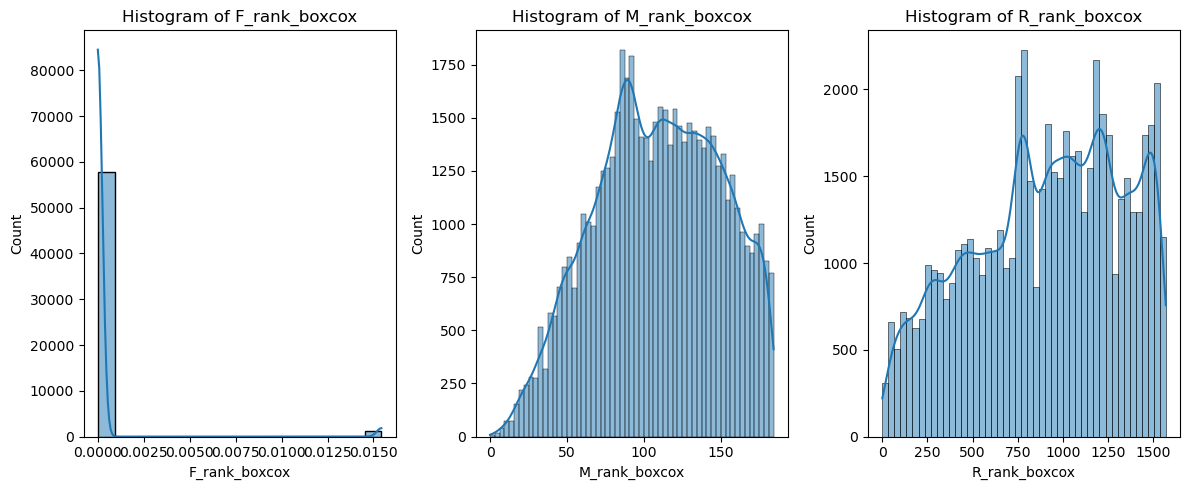

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Grafik pertama
sns.histplot(rfm_df['F_rank_boxcox'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of F_rank_boxcox')

# Grafik kedua
sns.histplot(rfm_df['M_rank_boxcox'], kde=True, ax=axes[1])
axes[1].set_title('Histogram of M_rank_boxcox')

# Grafik ketiga
sns.histplot(rfm_df['R_rank_boxcox'], kde=True, ax=axes[2])
axes[2].set_title('Histogram of R_rank_boxcox')

plt.tight_layout()
plt.show()

In [26]:
# Memeriksa skewness dari kolom F_rank
skewness_frank = pd.Series(rfm_df['F_rank_boxcox']).skew()

# Memeriksa skewness dari kolom M_rank
skewness_mrank = pd.Series(rfm_df['M_rank_boxcox']).skew()

# Memeriksa skewness dari kolom R_rank
skewness_rrank = pd.Series(rfm_df['R_rank_boxcox']).skew()

print("Skewness F_rank box cox:", skewness_frank)
print("Skewness M_rank box cox:", skewness_mrank)
print("Skewness R_rank box cox:", skewness_rrank)

Skewness F_rank box cox: 6.640224760900212
Skewness M_rank box cox: -0.12548244894522886
Skewness R_rank box cox: -0.290838755414099


In [27]:
rfm_df.F_rank.value_counts()

1.0    57724
2.0     1167
3.0       70
4.0       10
5.0        4
6.0        1
7.0        1
Name: F_rank, dtype: int64

In [28]:
rfm_df.F_rank_boxcox.value_counts()

0.000000    57724
0.015427     1253
Name: F_rank_boxcox, dtype: int64

Setelah dilakukan transformasi box cox, skewness dari kedua variabel tersebut menjadi lebih baik. Namun untuk variabel F masih terlihat belum terdistribusi secara normal. `Mengapa hal ini terjadi?`

Karena seperti yang sudah kita ketahui sebelumnya bahwa pada variabel F ini hanya terdapat 7 unique data, namun di dominasi dengan data 1 Frekuensi yang memiliki proporsi sebesar 98% dari keseluruhan data. Sehingga dengan demikian hal ini kita artikan sebagai data tersebut secara natural memang tidak terdistribusi secara normal.

Sedangkan pada variabel M terlihat bahwa data memiliki skewness di dalam rentang -2 dan 2 sehingga dapat dikategorikan menjadi terdistribusi dengan normal.

In [29]:
rfm_df.head()

,customer_unique_id,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,F_rank_boxcox,M_rank_boxcox,R_rank_boxcox
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,488.0,1.0,8607.0,0.0,131.946960,1238.593383
1,0000f46a3911fa3c0805444483337064,537,1,86.22,65.0,1.0,4797.0,0.0,100.711449,114.723274
2,0004bd2a26a76fe21f786e4fbd80607f,146,1,166.98,456.0,1.0,10199.0,0.0,142.677459,1143.507138
3,0005e1862207bf6ccc02e4228effd9a0,543,1,150.12,59.0,1.0,9150.0,0.0,135.720240,102.273155
4,0006fdc98a402fceb4eb0ee528f6a8d4,407,1,29.00,195.0,1.0,532.0,0.0,35.765973,420.238497


Jadi disini kita telah membuat sebuah tabel baru yakni `rfm_df` yang merupakan tabel yang akan digunakan sebagai RFM Analysis, nantinya kedua tabel ini dapat digabungkan untuk melakukan analisa lebih lanjut untuk masing masing dari segmentasi yang akan terbentuk dengan menghubungkan nya pada `customer_unique_id`.

## RFM Domain Knowledge

In [30]:
dk = rfm_df[['customer_unique_id', 'R_rank', 'F_rank', 'M_rank']].copy()
dk.head()

,customer_unique_id,R_rank,F_rank,M_rank
0,0000366f3b9a7992bf8c76cfdf3221e2,488.0,1.0,8607.0
1,0000f46a3911fa3c0805444483337064,65.0,1.0,4797.0
2,0004bd2a26a76fe21f786e4fbd80607f,456.0,1.0,10199.0
3,0005e1862207bf6ccc02e4228effd9a0,59.0,1.0,9150.0
4,0006fdc98a402fceb4eb0ee528f6a8d4,195.0,1.0,532.0


In [31]:
r_labels = range(4,0,-1)
r_quartiles = pd.qcut(dk['R_rank'], 4, labels = r_labels)

f_labels = range(1,5)
f_quartiles = pd.cut(dk['F_rank'], 4, labels = f_labels)

m_labels = range(1,5)
m_quartiles = pd.qcut(dk['M_rank'], 4, labels = m_labels)

dk = dk.assign(R=r_quartiles.values)
dk = dk.assign(F=f_quartiles.values)
dk = dk.assign(M=m_quartiles.values)

In [32]:
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])

dk['RFM_Segment'] = dk.apply(join_rfm, axis=1)
dk['RFM_Score'] = dk[['R', 'F', 'M']].sum(axis=1)

In [33]:
# Largest RFM Segments
dk.groupby('RFM_Segment').size().sort_values(ascending=False)[:10]

RFM_Segment
214    3911
312    3863
411    3831
113    3800
412    3766
213    3746
311    3714
111    3657
114    3636
313    3610
dtype: int64

In [34]:
# Bottom 5 rows
dk[dk['RFM_Segment']=='111'][:5]

,customer_unique_id,R_rank,F_rank,M_rank,R,F,M,RFM_Segment,RFM_Score
9,000ec5bff359e1c0ad76a81a45cb598f,589.0,1.0,454.0,1,1,1,111,3
10,000ed48ceeb6f4bf8ad021a10a3c7b43,498.0,1.0,143.0,1,1,1,111,3
20,00196c4c9a3af7dd2ad10eade69c926f,569.0,1.0,1097.0,1,1,1,111,3
25,001a3a8e11d76c9a366c31a4aa2cc529,499.0,1.0,284.0,1,1,1,111,3
68,0048a779a98a7848514096ff04046079,577.0,1.0,1351.0,1,1,1,111,3


In [35]:
dk.groupby('RFM_Score').agg({
    'R_rank': 'mean',
    'F_rank': 'mean',
    'M_rank': ['mean', 'count']
})

R_rank    F_rank        M_rank       
                 mean      mean          mean  count
RFM_Score                                           
3          546.845775  1.001914   1499.747334   3657
4          491.605437  1.005353   2881.544725   7099
5          438.664890  1.009304   4561.869118  11071
6          363.645288  1.020561   6612.598660  15077
7          313.061560  1.031134   8478.936317  11306
8          243.668575  1.041341  10514.923603   7160
9          157.504038  1.060707  13459.544138   3591
10         221.187500  3.500000  15887.375000     16

In [36]:
def segment_me(dk):
    if dk['RFM_Score'] >= 8:
        return 'Best'
    elif (dk['RFM_Score'] >= 6) and (dk['RFM_Score'] < 8):
        return 'Good'
    elif (dk['RFM_Score'] >= 4) and (dk['RFM_Score'] < 6):
        return 'Potential Lost'
    else:
        return 'Lost'

In [37]:
dk['Segment'] = dk.apply(segment_me, axis=1)
dk.groupby('Segment').agg({
    'R_rank': 'mean',
    'F_rank': 'mean',
    'M_rank': ['mean', 'count']
}).round(1)

R_rank F_rank   M_rank       
                 mean   mean     mean  count
Segment                                     
Best            214.9    1.1  11505.0  10767
Good            342.0    1.0   7412.4  26383
Lost            546.8    1.0   1499.7   3657
Potential Lost  459.3    1.0   3905.4  18170

In [38]:
dk.head()

,customer_unique_id,R_rank,F_rank,M_rank,R,F,M,RFM_Segment,RFM_Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,488.0,1.0,8607.0,2,1,3,213,6,Good
1,0000f46a3911fa3c0805444483337064,65.0,1.0,4797.0,4,1,2,412,7,Good
2,0004bd2a26a76fe21f786e4fbd80607f,456.0,1.0,10199.0,2,1,4,214,7,Good
3,0005e1862207bf6ccc02e4228effd9a0,59.0,1.0,9150.0,4,1,3,413,8,Best
4,0006fdc98a402fceb4eb0ee528f6a8d4,195.0,1.0,532.0,4,1,1,411,6,Good


Berdasarkan hasil yang telah kita lakukakn segmentasi secara manual terlihat cukup masuk akal. Namun kenyataanya dalam menentukan segmentasi customer memerlukan trial error dalam menentukan cut-off yang tepat untuk tiap segmen. Sehingga dengan demikian kita akan menggunakan K-Means clustering untuk membuat segmentasi dengan berdsarakan kemiripan customer.

Pengunaan K-Means clustering ataupun model lainnya akan membantu untuk membuat segmentasi yang lebih akurat dan dapat meningkatkan pemahaman tentang perilaku pelanggan sehingga dengan demikian penentuan nilai cut-off pada masing masing cluster tidak dilakukan secara subjektif yang dapat menyebabkan pengelompokkan kurang akurat dan menghasilkan kesimpulan yang keliru terhadap perilaku pelanggan. Jadi dapat disimpulkan bahwa penggunaan model atau algoritma seperti K-Means dapat berguna untuk melakukan segmentasi secara objektif dan lebih akurat.

In [39]:
# df.to_csv('3. feature_engineering.csv', index=False)
# rfm_df.to_csv('3. rfm_df.csv', index=False)

**Lanjut Ke Part Selanjutnya: 4. Modeling**